In [1]:
import csv
import cv2
import importlib as imp
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas
import scipy
import sklearn
import shutil
import time

from distutils.dir_util import copy_tree
from pandas.tools.plotting import scatter_matrix
from sklearn import mixture
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import silhouette_samples

pj = os.path.join

%matplotlib inline

In [53]:
g_tubs_dir = "J:/RaspberryPi/DonkeyCar/tubs"
g_tub_dir = pj(g_tubs_dir, "tub_clean4")
g_videos_dir = "J:/RaspberryPi/DonkeyCar/videos"

X_keys = ['cam/image_array']
y_keys = ['user/angle', 'user/throttle']
X_key = X_keys[0]
ANGLE = y_keys[0]
THROT = y_keys[1]

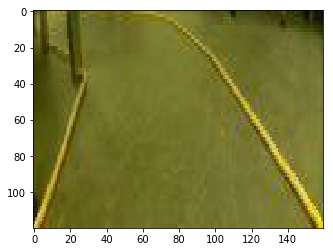

In [58]:
img = cv2.imread( pj(g_tub_dir, "1_cam-image_array_.jpg") )
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

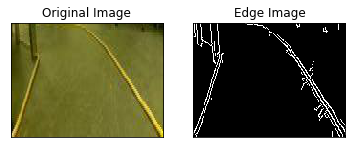

In [59]:
edges = cv2.Canny(img,100,200)

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.xticks([])
plt.yticks([])

plt.show()

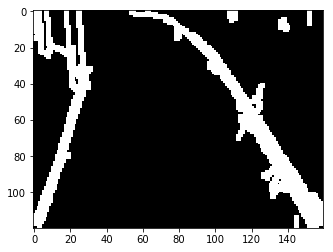

In [60]:
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 1)
plt.imshow(dilation, cmap='gray')

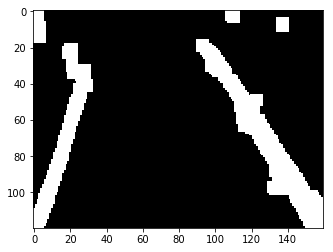

In [61]:
erosion = cv2.erode(dilation,kernel,iterations = 2)
dilation2 = cv2.dilate(erosion,kernel,iterations = 3)
plt.imshow(dilation2, cmap='gray')

In [62]:
def convert_to_edges(idx):
    img = cv2.imread( pj(g_tub_dir, str(idx) + "_cam-image_array_.jpg") )
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    edges = cv2.Canny(img,100,200)
    kernel = np.ones((3,3),np.uint8)
    dilation = cv2.dilate(edges, kernel, iterations=1)
    erosion = cv2.erode(dilation, kernel, iterations=2)
    dilation2 = cv2.dilate(erosion, kernel, iterations=3)
    return dilation2

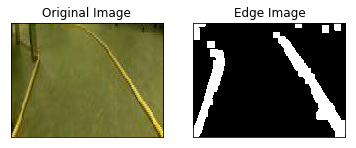

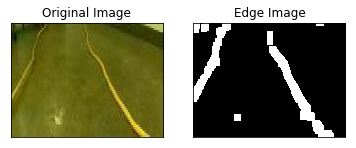

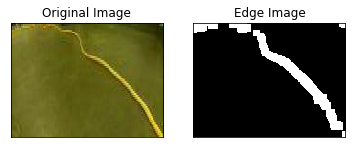

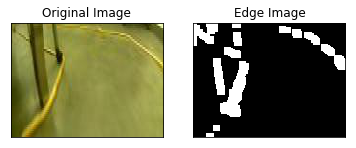

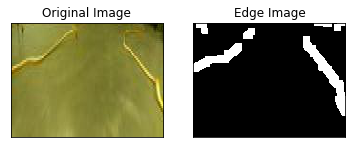

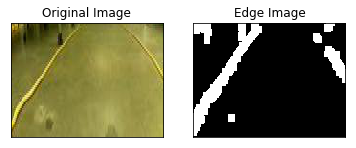

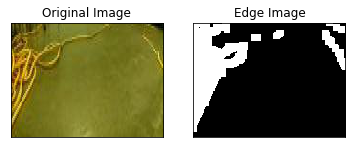

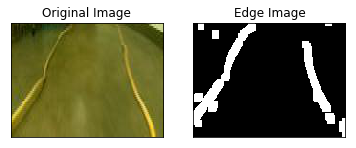

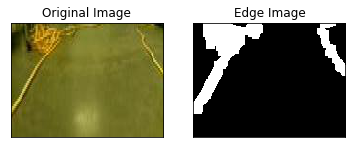

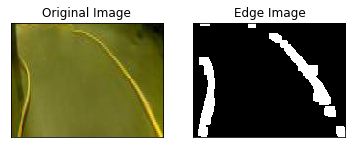

In [63]:
kernel = np.ones((3,3),np.uint8)
for i in range(0,10):
    idx = str(i*400 + 5)
    img = cv2.imread( pj(g_tub_dir, idx+"_cam-image_array_.jpg") )
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    edges = cv2.Canny(img,100,200)
    dilation = cv2.dilate(edges, kernel, iterations=1)
    erosion = cv2.erode(dilation, kernel, iterations=2)
    dilation2 = cv2.dilate(erosion, kernel, iterations=3)
    
    plt.figure()
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(122)
    plt.imshow(dilation2, cmap='gray')
    plt.title('Edge Image')
    plt.xticks([])
    plt.yticks([])


In [52]:
edges_dir = pj(g_tubs_dir, g_tub_dir+"_edges")
for i in range(4296):
    edge_img = convert_to_edges(i)
    edge_img_rgb = cv2.cvtColor(edge_img, cv2.COLOR_GRAY2RGB)
    cv2.imwrite(pj(edges_dir, str(i) + "_cam-image_array_.jpg"), edge_img_rgb)